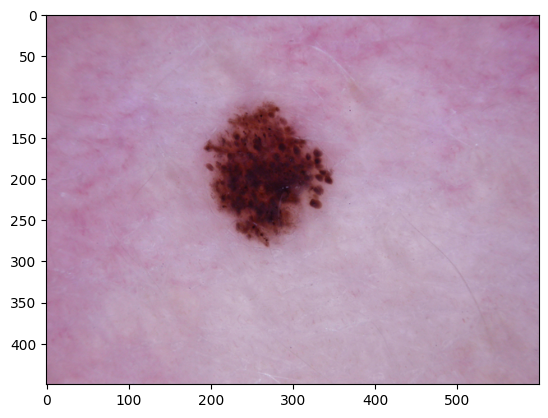

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline
 
# Read in the image
image = cv2.imread(r"D:\WorkSpace_Thinh1\Nhom15-Parallel-Source\ReactJSParallel\server1\data_test\ISIC2018_Task3_Test_Images\ISIC_0036039.jpg")
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

In [10]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

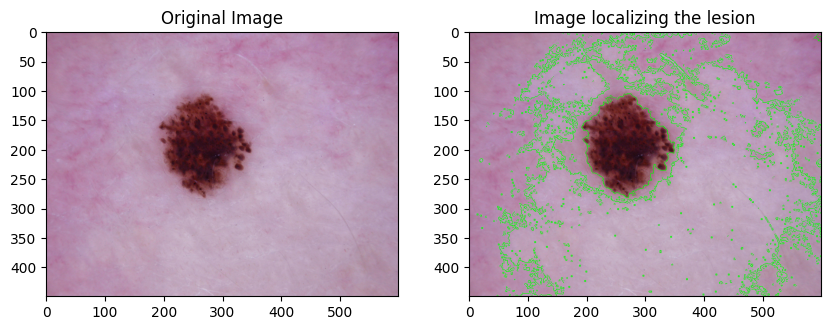

In [11]:
# Define criteria for the algorithm to stop
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Perform k-means clustering
k = 4  # Number of clusters
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert labels to the original image shape
labels = labels.reshape((image.shape[:2]))


mask = (labels == 0).astype(np.uint8) * 255
# Detect edges between the clusters
edges = cv2.Canny(mask, 100, 200)
    
# Draw the edges on the original image
image_with_edges = image.copy()
image_with_edges[edges == 255] = [0, 255, 0]


# Plot the original image and the image with boundaries
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_with_edges)
plt.title('Image localizing the lesion')

plt.show()